# Communicating Data Findings with FordGo Bike system Data
## (January 2018 - December 2018)

## by Saikiran Bikumalla


---
---



## Investigation Overview
> In this investigation of Ford Gobike system data , i wanted to look at the characteristics each variable and impact of different attributes like user type, day, month and ride duration on the gobike system




## Dataset Overview
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

In [2]:
# import the dataset
df = pd.read_csv('datasets/fordgo_master.csv')
# view the first five rows of dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,813,Customer,No
1,60644,2018-08-31 21:40:01.7490,2018-09-01 14:30:46.4470,50.0,2nd St at Townsend St,37.780526,-122.390288,50.0,2nd St at Townsend St,37.780526,-122.390288,1964,Subscriber,No
2,57922,2018-08-31 20:04:28.1630,2018-09-01 12:09:50.8240,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,535,Customer,No
3,82573,2018-08-31 13:07:14.9020,2018-09-01 12:03:28.2600,19.0,Post St at Kearny St,37.788975,-122.403452,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,3080,Customer,No
4,57677,2018-08-31 19:48:45.1980,2018-09-01 11:50:03.1560,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,132,Customer,No


In [5]:
# do some data cleaning : drop nan , remove some insignificant features like 
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),813,Customer,No
1,60644,2018-08-31 21:40:01.7490,2018-09-01 14:30:46.4470,50.0,2nd St at Townsend St,50.0,2nd St at Townsend St,1964,Subscriber,No
2,57922,2018-08-31 20:04:28.1630,2018-09-01 12:09:50.8240,17.0,Embarcadero BART Station (Beale St at Market St),30.0,San Francisco Caltrain (Townsend St at 4th St),535,Customer,No
3,82573,2018-08-31 13:07:14.9020,2018-09-01 12:03:28.2600,19.0,Post St at Kearny St,34.0,Father Alfred E Boeddeker Park,3080,Customer,No
4,57677,2018-08-31 19:48:45.1980,2018-09-01 11:50:03.1560,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),132,Customer,No


In [6]:
# test
df.shape

(1735490, 10)

In [7]:
# code
# changing start_time and end_time to datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
# changing user_type and bike_share_for_all_trip to category dtypes
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [9]:
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)

In [11]:
# lets add some more columns which we might use for analysis
# start month (January - December)
df['start_month'] = df['start_time'].dt.strftime('%B')

# start month number 
df['start_month_num'] = df['start_time'].dt.month.astype(int)

# start week day 
df['start_weekday'] = df['start_time'].dt.strftime('%a')

# start hour on a day
df['start_hour']  = df['start_time'].dt.hour

## Univariate Exploration


### 1.  Average Trip duration

> The average trip rate is just under 14 minutes and 75% of the trips duration fall under 14 minutes. From the plot it's evident that the popular duration is in the range of 5-20 min, which means that the riders are taking short rides.

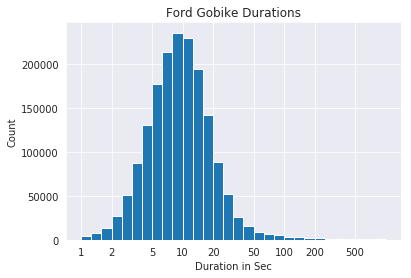

In [20]:
# convert second to minutes
df['duration_min'] = df['duration_sec']/60

# compute bins for logarithmic axis
bin_edges = 10**np.arange(0,3+0.1,0.1)
ticks = [1,2,5,10,20,50,100,200,500]
labels = ['{}'.format(v) for v in ticks]

plt.hist(df.duration_min, bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Duration in Sec')
plt.ylabel('Count')
plt.title('Ford Gobike Durations');

### 2. Monthly usage of Ford Gobike

> The summer months and mid Autumn are the most popular times to use the Ford Gobike sharing. October is the most popular month and June, July fall next. August and september aren't far behind.

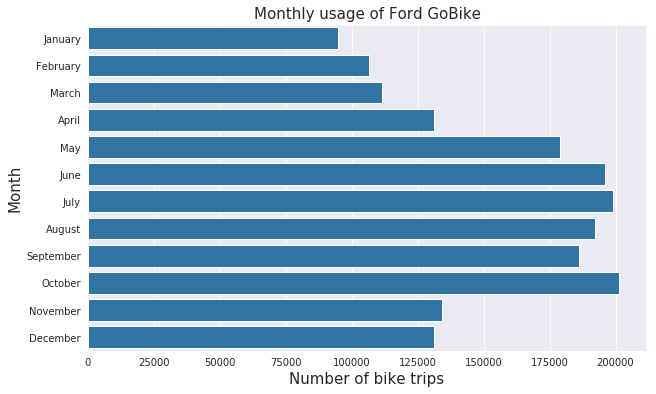

In [49]:
# Monthly usage of ford gobike 
plt.figure(figsize=[10,6])
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data = df, y='start_month',color=base_color,order = order_months);
plt.xlabel('Number of bike trips',fontsize = 15)
plt.ylabel('Month',fontsize = 15)
plt.title('Monthly usage of Ford GoBike',fontsize = 15);

### 3. Week day Usage of Ford Gobike
>  Surprisingly the least popular days for using Ford Gobike system are weekends and the most popular days are weekday with very much difference. From this we could analyse that all the users who are using Ford Gobike are using it for their commuting purposes on weekdays

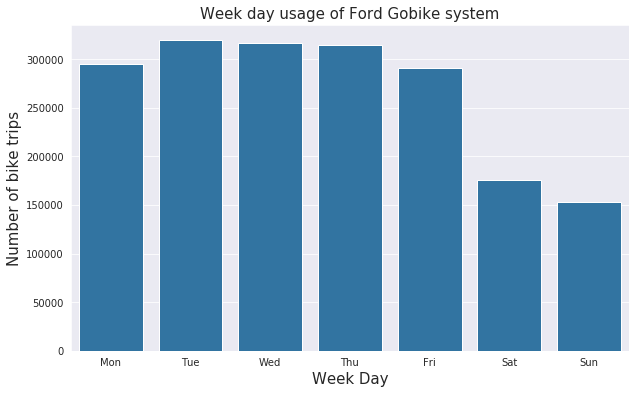

In [48]:
# week day usage of ford gobike
plt.figure(figsize=[10,6])
order_weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data = df, x='start_weekday',color = base_color, order = order_weekdays);
plt.ylabel('Number of bike trips',fontsize = 15)
plt.xlabel('Week Day',fontsize = 15)
plt.title('Week day usage of Ford Gobike system',fontsize = 15);

### 4. Hourly usage of Ford Gobike
> The distribution is bimodal and we can see the most popular times of ford gobike system usage are morning 8-9am and evening 4-6pm. This futher strengthens the observation made that these bikes are being used for commuting purposes. 

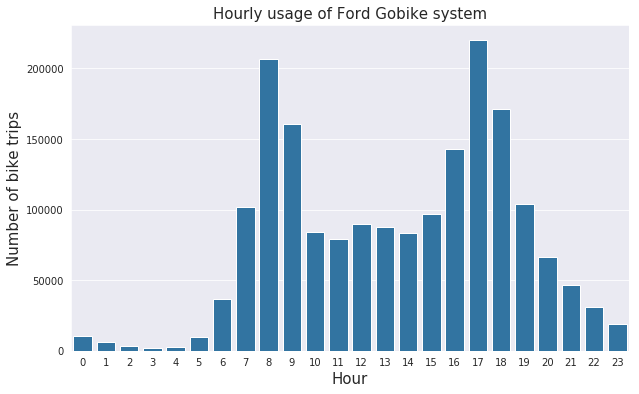

In [47]:
# hourly usage of ford gobike
plt.figure(figsize=[10,6])
sns.countplot(data = df, x='start_hour',color = base_color);
plt.ylabel('Number of bike trips',fontsize = 15)
plt.xlabel('Hour',fontsize = 15)
plt.title('Hourly usage of Ford Gobike system',fontsize = 15);

### 5. Exploring different user types
> Most number of bike trips are taken by user type who are subscribers. Customers relatively take very less amount. Number of subscribers who take ride constitute 85% whereas customers constitute 15%. 

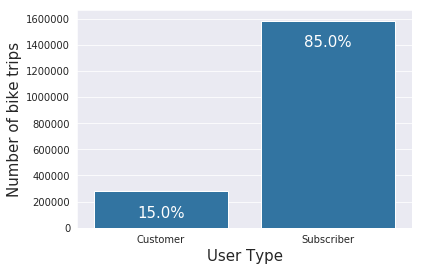

In [89]:
# plotting the number of different types of users

user_counts = df.user_type.value_counts()
user_order = user_counts.index

for i in range(user_counts.shape[0]):
    count = user_counts[i]
    percent = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i,count-200000,percent,ha='center',color='white',fontsize=15)

sns.countplot(data = df , x = 'user_type', color = base_color);
plt.xlabel('User Type',fontsize=15)
plt.ylabel('Number of bike trips',fontsize=15);

## Bivariate Exploration


### 1. User type vs Monthly usage


> Winter months(Jan,feb) are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 

> Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area. 

> Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute

> The point plot visual showing a sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase from may to july (summer). Subscribers - there is steadily high usage between may and october with a sharp peek in october.

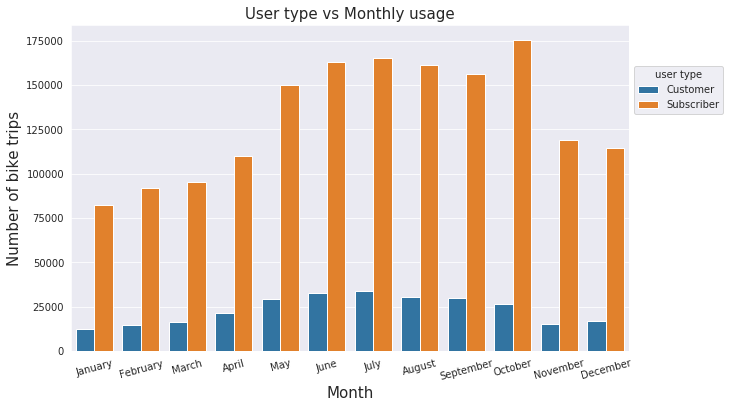

In [101]:
# cutsomer usage by month and subscriber usage by month
plt.figure(figsize=[10,6])

order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# both are categorical variables, hence clustered bar chart 

sns.countplot(data=df, x='start_month',hue ='user_type',order = order_months);
plt.xticks(rotation = 15);
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Number of bike trips',fontsize=15)
plt.title('User type vs Monthly usage',fontsize=15);
# legend to right
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8));

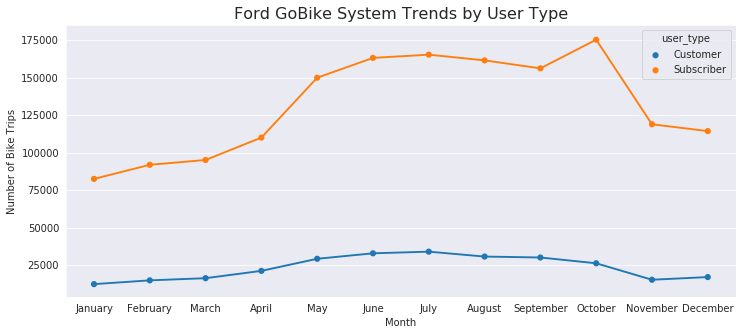

In [117]:
# we can even use pointplot

plt.figure(figsize=(12, 5))

df_user_month = df.groupby(['start_month', 'user_type']).size().reset_index()
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

ax = sns.pointplot(data=df_user_month, x='start_month', y=0, hue = 'user_type', scale=.7, order = order_months);

plt.title('Ford GoBike System Trends by User Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips');

### 2. User type vs Week day usage
> The point plot showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend. we may think that subscribers are those who use bikes for daily commutes and customers are those who may be tourists or ocassional riders to the bay area

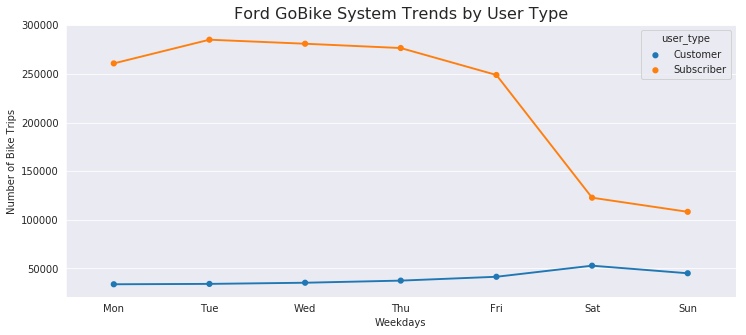

In [115]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
# qualitative vs qualitative variable, point plot or clustered bar charts can be used

plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_user_week, x='start_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', fontsize=16)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');

### 4. Seasonal effect on trip duration

- As expected, summer has the longest trip duration , with average trip duration above 14 mins.
- But there is no significant difference of trip duration in terms of four seasons. It is probably because the weather in San Francisco bay area does not change that much.

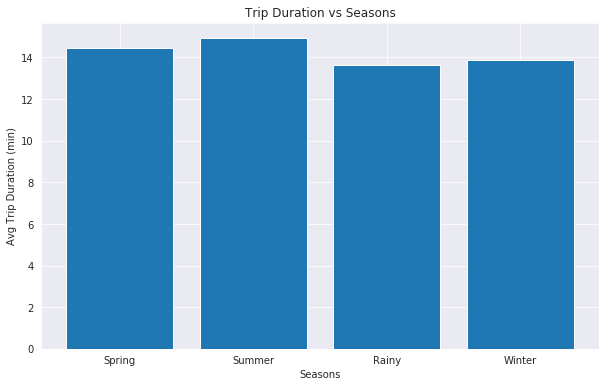

In [126]:
# collect the seasonal data 

spring_mean = df.query('start_month_num in ["3" , "4" , "5"]' )['duration_min'].mean ()
summer_mean = df.query('start_month_num in ["6" , "7" , "8"] ')['duration_min'].mean()
rainy_mean = df.query('start_month_num in ["9" , "10" , "11"] ')['duration_min'].mean()
winter_mean = df.query('start_month_num in ["12" , "1" , "2"]' )['duration_min'].mean()

# one qualitative and other numeric varibale
# here i am using adaptation of univariate barplot to get a bivariate plot 

plt.figure(figsize=[10,6])
plt.bar(['Spring','Summer','Rainy','Winter'],[spring_mean , summer_mean , rainy_mean , winter_mean] )
plt.title('Trip Duration vs Seasons')
plt.xlabel('Seasons')
plt.ylabel('Avg Trip Duration (min)');

## Multivariate Exploration


## 1. Does user type lead to lower trip duration per month?

- It is clearly evident that number of customers are less than subscribers (data color encodings)
- In every month the number of people who take less duration rides are mostly subscribers and people who take long duration rides are customers.
- In month of may, june and july the amount of subscribers who take long duration rides are more(increased) when compared to other months

/home/bikumalla/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


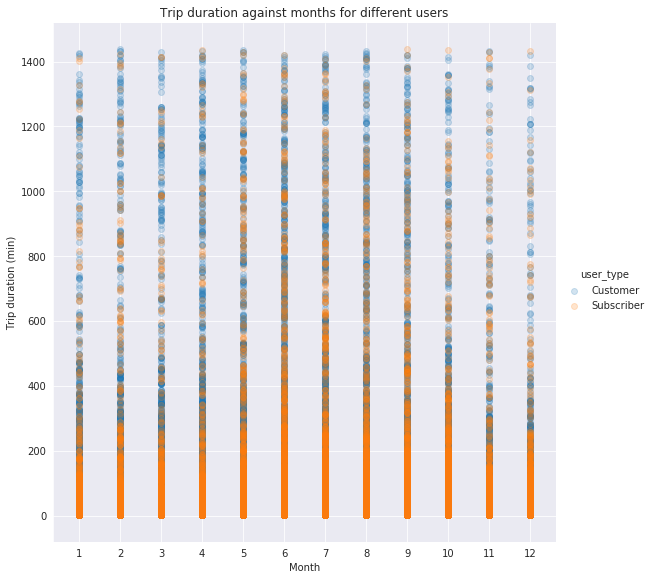

In [133]:
# two numeric variables month_num and duration_min and one categorical variable user_type
# we can use color encoded scatter plot

g = sns.FacetGrid(data = df , hue = 'user_type' , size = 8)
g.map(plt.scatter , 'start_month_num' , 'duration_min' , alpha =0.2)
g.add_legend()
plt.title('Trip duration against months for different users')
plt.xlabel('Month')
plt.ylabel('Trip duration (min)')
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(ticks,ticks);

### 2. Variation of average trip duration in weekdays between customers and subscribers
> subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

Text(0.5, 1.0, 'Avg trip duartion variation with weekday')

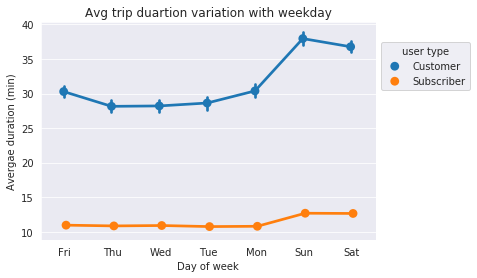

In [21]:
# we have two qualitative variables and one quantitave variable
# lets create a point plot for Average trip duration in weekdays
# then encode the user types with color encoding

sns.pointplot(data = df,x='start_weekday',y='duration_min',hue='user_type',dodge=True)
plt.xlabel('Day of week')
plt.ylabel('Avergae duration (min)')
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8));
plt.title('Avg trip duartion variation with weekday')

### Summary:

> Different usage pattern/habit between the two type of riders are seen from the exploration. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 5-6pm on work days for subscribers, yet customers tend to use more in the late afternoon around 17pm Monday to Friday.

> The multivariate exploration of data strengthened some of the patterns discovered in the bivariate exploration and univariate exploration, the relationship between multiple variables plotted is visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours(8-9am and 5-6pm) Monday through Friday, indicating the use is primarily for work commute. The more flexible and relaxing pattern of customer usage shows that they're taking advantage of the bike sharing system differently from the subscribers, heavily over weekends for city tour or leisure purpose probably.
